# Morphological Image Processing

Morphological operations transform images based on shape. They can be seen as non-linear spatial filters in which the kernel/footprint shape and size have a strong impact in the results. In this context, the kernel is also called structural element. 

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import morphology

## Structural element

The structural element (SE) is a probe that runs through the image, modifying each pixel depending on how well its shape matches the surroundings. This is best explained with some examples.

Let's create 3 different SE: a square and a disk. Scikit-image has built-in functions to generate those.

In [2]:
disk = morphology.disk(3) # creates a disk of 1 with radius = 3
print('disk = \n', disk)

square = morphology.square(5) # creates a square with edges = 5
print('square = \n', square)

disk = 
 [[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]
square = 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Now let's perform some morphological operations with them on an image.

## Binary morphology

The changes in shape are more pronounced in binary images. So, let's start with a binary cells image.

In [3]:
image_path = '../../data/mitosis_mod.tif'
image_cells = imread(image_path).astype(float)
image_cells_binary = image_cells > 60

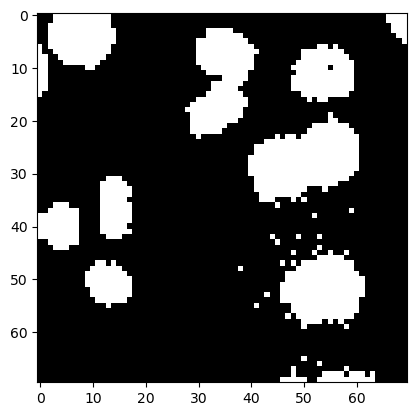

In [4]:
plt.imshow(image_cells_binary, cmap='gray')

### Erosion and Dilation

The erosion is a spatial minimum filter. This means that, for every pixel, it gets the surronding pixels that underlie the SE shape and returns the minimal value.

In the binary case, this means that, if a pixel has any 0-valued neighbouring pixel around it that lies beneath the SE, it will recevie 0.

Overall, this gives the impression that the white (positive value) structures are getting consumed/eroded. Let's apply erosion with a square and with a disk.

In [5]:
binary_eroded_disk = morphology.binary_erosion(image_cells_binary, disk)

binary_eroded_square = morphology.binary_erosion(image_cells_binary, square)

Text(0.5, 1.0, 'erosion square')

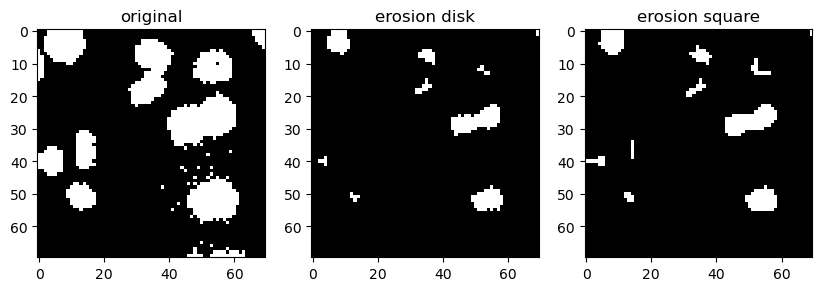

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(image_cells_binary, cmap = 'gray')
ax[0].set_title('original')

ax[1].imshow(binary_eroded_disk, cmap = 'gray')
ax[1].set_title('erosion disk')

ax[2].imshow(binary_eroded_square, cmap = 'gray')
ax[2].set_title('erosion square')

In both cases, the elements got consumed. However, the disk consumed more for 2 reasons:
    
    1. The structures in the image are roundish, resembling more the disk SE;
    
    2. The disk SE is bigger than the square;

Dilation is exactly the opposite, i.e., it is a spatial maximum filter and the overall impression is that structures are growing/dilating.

In [7]:
binary_dilated_disk = morphology.binary_dilation(image_cells_binary, disk)

binary_dilated_square = morphology.binary_dilation(image_cells_binary, square)

Text(0.5, 1.0, 'dilation square')

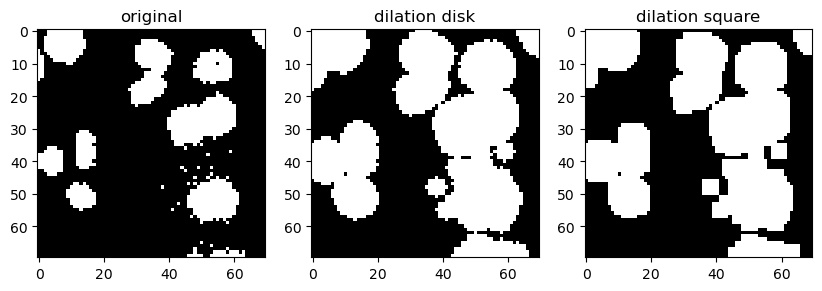

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(image_cells_binary, cmap = 'gray')
ax[0].set_title('original')

ax[1].imshow(binary_dilated_disk, cmap = 'gray')
ax[1].set_title('dilation disk')

ax[2].imshow(binary_dilated_square, cmap = 'gray')
ax[2].set_title('dilation square')

### Openning and Closing

The morphological **opening** on an image is defined as an **erosion followed by a dilation**, while **closing** is a **dilation followed by an erosion**.

In [9]:
binary_opening_disk = morphology.binary_opening(image_cells_binary, disk)

binary_opening_square = morphology.binary_opening(image_cells_binary, square)

Text(0.5, 1.0, 'opening square')

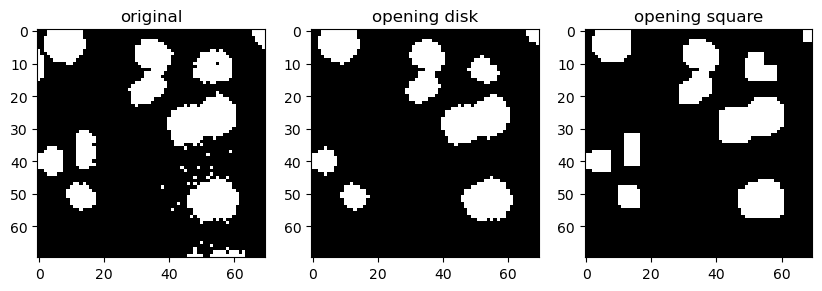

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(image_cells_binary, cmap = 'gray')
ax[0].set_title('original')

ax[1].imshow(binary_opening_disk, cmap = 'gray')
ax[1].set_title('opening disk')

ax[2].imshow(binary_opening_square, cmap = 'gray')
ax[2].set_title('opening square')

Opening tends to disconnect/separate white (high intensity) structures that are weakly connected. Because it performs erosion first, it may also erase isolated small white structures.

On the other hand, closing tends to connect strucutres that are in close proximity. Because it does dilation first, it may also close small holes (low intensity regions) inside white (high intensity) structures.

In [11]:
binary_closing_disk = morphology.binary_closing(image_cells_binary, disk)

binary_closing_square = morphology.binary_closing(image_cells_binary, square)

Text(0.5, 1.0, 'closing square')

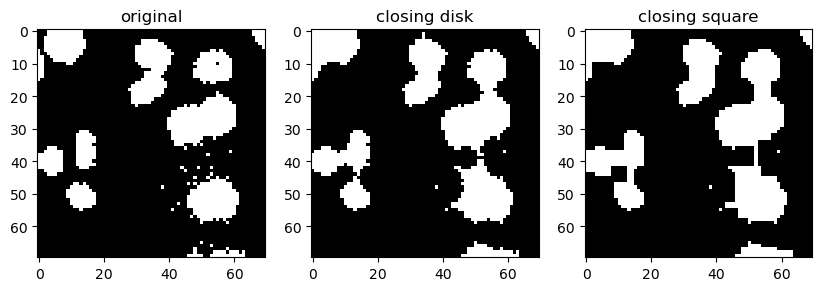

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(image_cells_binary, cmap = 'gray')
ax[0].set_title('original')

ax[1].imshow(binary_closing_disk, cmap = 'gray')
ax[1].set_title('closing disk')

ax[2].imshow(binary_closing_square, cmap = 'gray')
ax[2].set_title('closing square')

Opening and closing are usually prefered over plain erosion and dilation because they tend to better preserve structures size.

# Exercise 1

Below, we have applied dilation (with a big disk SE) to the grayscale cells image. Apply the other operations (erosion, opening and closing) and show the results.

In [13]:
big_disk = morphology.disk(10)

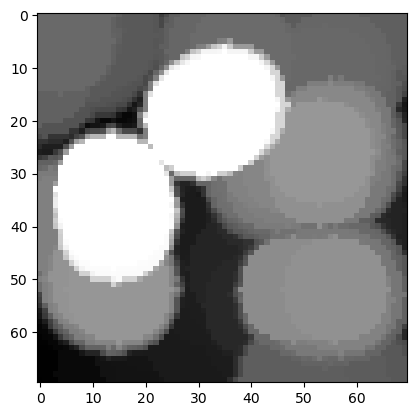

In [14]:
dilated_image = morphology.dilation(image_cells, big_disk)
plt.imshow(dilated_image, cmap = 'gray')

# Exercise 2

Subtract each result from Exercise 1 from the original image, for example:

In [15]:
subtracted_dilated = image_cells - dilated_image 

and display the results as well as the original image again.

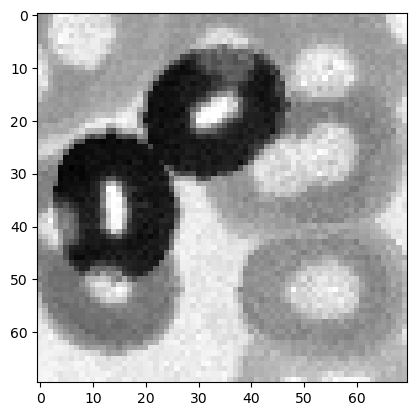

In [16]:
plt.imshow(subtracted_dilated, cmap = 'gray')

# Exercise 3

Apply the `white_tophat` function from scikit-image on the original image and display the result. 

Use the same SE (`big_disk`) from Exercise 2. Compare this result with the results from Exercise 2.


What can you conclude?



*Hint: the `big_disk` should be given as the `footprint` parameter of the `white_tophat` function

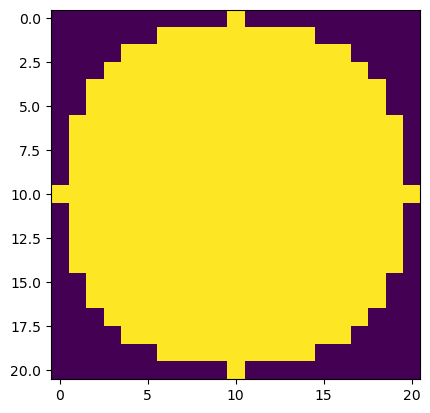

In [17]:
plt.imshow(big_disk)

In [18]:
morphology.white_tophat?

Signature: morphology.white_tophat(image, footprint=None, out=None)
Docstring:
Return white top hat of an image.


The white top hat of an image is defined as the image minus its
morphological opening. This operation returns the bright spots of the image
that are smaller than the footprint.

Parameters
----------
image : ndarray
    Image array.
footprint : ndarray, optional
    The neighborhood expressed as an array of 1's and 0's.
    If None, use cross-shaped footprint (connectivity=1).
out : ndarray, optional
    The array to store the result of the morphology. If None
    is passed, a new array will be allocated.

Returns
-------
out : array, same shape and type as `image`
    The result of the morphological white top hat.

Other Parameters
----------------
selem : DEPRECATED
    Deprecated in favor of `footprint`.

    .. deprecated:: 0.19

See Also
--------

:func:`black_tophat`
    ..

References
----------
.. [1] https://en.wikipedia.org/wiki/Top-hat_transform

Examples
------